In [6]:
using PyPlot, Revise, Random, ProgressMeter
#includet("2NNlogistic-param-predict.jl")
using3D()

In [7]:
"""
Gradient ascent to train a 2-layers ReLU neural net for the soft-min loss
INPUT: X (training input), Y (training output), m (nb neurons), both: training both layers or just the output
OUTPUT: Ws (training trajectory)
"""
function logistic_reg(X, Y, stepsize, niter) 
    (n,d) = size(X)
    a     = zeros(d+1)
    as    = zeros(d+1, niter) # store optimization path
    betas = zeros(niter)
    margins = zeros(niter)
    Z = Y .* cat(X, 1*ones(n), dims=2)/10

    for iter = 1:niter
        as[:,iter] = a
        perf = Z*a
        margin = minimum(perf)
        p = exp.( margin .- Z*a)
        p = p./ sum(p)
        grad = Z'*p
        betas[iter] = maximum([1,sqrt(sum(a.^2))])
        margins[iter] = margin/sqrt(sum(a.^2))
        a = a + betas[iter] * stepsize * grad /(sqrt(iter+1))
    end
    as, betas, margins
end


logistic_reg

In [59]:
"""
Gradient ascent to train a 2-layers ReLU neural net for the soft-min loss
INPUT: X (training input), Y (training output), m (nb neurons), both: training both layers or just the output
OUTPUT: Ws (training trajectory)
"""
function logistic_reg_lin(X, Y, stepsize, niter) 
    (n,d) = size(X)
    a     = zeros(d)
    as    = zeros(d, niter) # store optimization path
    betas = zeros(niter)
    margins = zeros(niter)
    Z = Y .* X

    for iter = 1:niter
        as[:,iter] = a
        perf = Z*a
        margin = minimum(perf)
        p = exp.( margin .- Z*a)
        p = p./ sum(p)
        grad = Z'*p
        betas[iter] = maximum([1,sqrt(sum(a.^2))])
        margins[iter] = margin/sqrt(sum(a.^2))
        a = a + betas[iter] * stepsize * grad /(sqrt(iter+1))
    end
    as, betas, margins
end


logistic_reg_lin

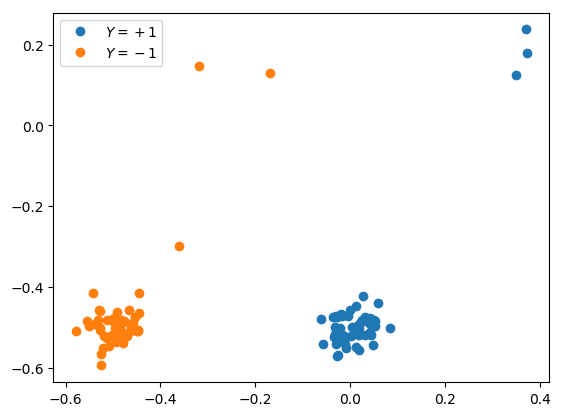

PyObject <matplotlib.legend.Legend object at 0x7fc59663d908>

In [8]:
Random.seed!(4)
nx = 3
nxx = 50
n = 2*(nx + nxx)
XX = rand(nx,2) 
A1 = (XX[:,1] .+ max.(XX[:,2] .- XX[:,1], 0) .+0.0)/2.5 
A2 = XX[:,2] .- max.(XX[:,2] .- XX[:,1], 0) .- 0.5
AA = [0; -0.5]' .+ 0.03*randn(nxx,2)
XX = rand(nx,2) 
B1 = (XX[:,1] .+ min.(XX[:,2] .- XX[:,1], 0) .-1.0)/2.5
B2 = XX[:,2] .- min.(XX[:,2] .- XX[:,1], 0) .-0.5
BB = [-0.5; -0.5]' .+ 0.03*randn(nxx,2)
X = [A1 A2;AA; B1 B2;BB]
Y = cat(ones(nx+nxx), -ones(nx+nxx), dims=1)
plot(X[Y.==1,1], X[Y.==1,2],"oC0",label=L"Y=+1")
plot(X[Y.==-1,1], X[Y.==-1,2],"oC1",label=L"Y=-1")
legend()

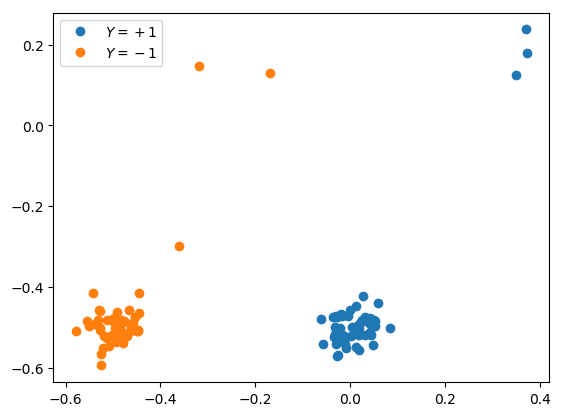

PyObject <matplotlib.legend.Legend object at 0x7fc596a20dd8>

In [9]:
Random.seed!(4)
nx = 3
nxx = 50
n = 2*(nx + nxx)
XX = rand(nx,2) 
A1 = (XX[:,1] .+ max.(XX[:,2] .- XX[:,1], 0) .+0.0)/2.5 
A2 = XX[:,2] .- max.(XX[:,2] .- XX[:,1], 0) .- 0.5
AA = [0; -0.5]' .+ 0.03*randn(nxx,2)
XX = rand(nx,2) 
B1 = (XX[:,1] .+ min.(XX[:,2] .- XX[:,1], 0) .-1.0)/2.5
B2 = XX[:,2] .- min.(XX[:,2] .- XX[:,1], 0) .-0.5
BB = [-0.5; -0.5]' .+ 0.03*randn(nxx,2)
X = [A1 A2;AA; B1 B2;BB]
Y = cat(ones(nx+nxx), -ones(nx+nxx), dims=1)
plot(X[Y.==1,1], X[Y.==1,2],"oC0",label=L"Y=+1")
plot(X[Y.==-1,1], X[Y.==-1,2],"oC1",label=L"Y=-1")
legend()

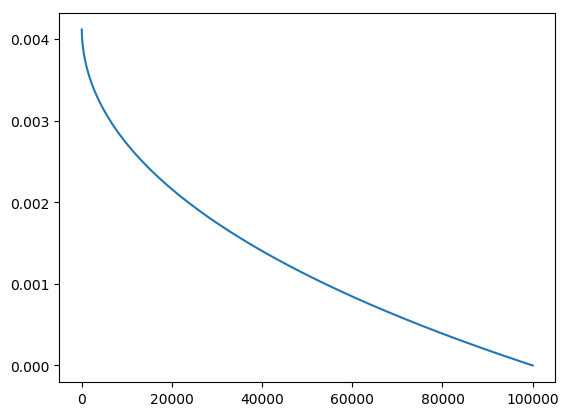

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc596c96fd0>

In [10]:
stepsize = 0.05
niter = 100000
as, betas, margins = logistic_reg(X, Y, stepsize, niter)
abars = as ./ betas'
plot(margins[end] .- margins)

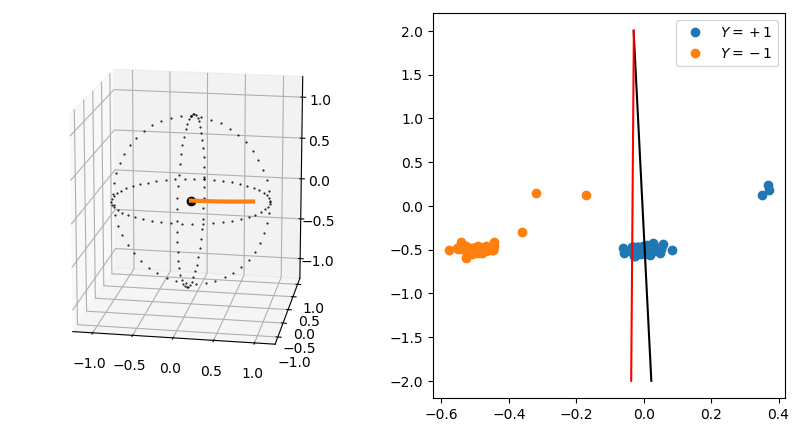

PyObject <matplotlib.legend.Legend object at 0x7fc57e5ea1d0>

In [17]:
# Create a sphere
fig = figure(figsize=[10,5])
ax1 = subplot(121, projection="3d")

res = 50
phi = range(0.0, 2π, length=res)#.* ones(res)'
#theta =  ones(res) .* range(0.0, 2π, length=res)'
#x = sin.(phi) .* cos.(theta)
#y = sin.(phi) .* sin.(theta)
#z = cos.(phi)

plot3D(sin.(phi), cos.(phi),zeros(res),".k",ms=1)
plot3D(sin.(phi), zeros(res),cos.(phi),".k",ms=1)
plot3D(zeros(res),sin.(phi), cos.(phi),".k",ms=1)
#plot_surface(x, y, z,  rstride=1, cstride=1, color="C0", alpha=0.1, linewidth=0,shade=true)
ax1.set_xlim3d(-1.2, 1.2)
ax1.set_ylim3d(-1.2, 1.2)
ax1.set_zlim3d(-1.2, 1.2)
ax1.view_init(15,-80)
plot3D([0],[0],[0],"ok")
#plot3D(abars[1,:], abars[2,:],abars[3,:],"C0",lw=3)
N = max.(atan.(betas)./atan(1),1)
plot3D(abars[1,:] .* N, abars[2,:].* N,abars[3,:],"C1",lw=3)

ax2 = subplot(122)
plot(X[Y.==1,1], X[Y.==1,2],"oC0",label=L"Y=+1")
plot(X[Y.==-1,1], X[Y.==-1,2],"oC1",label=L"Y=-1")
ts = -2:0.1:2
iter=1000
    plot(-(abars[2,iter].*ts .+ abars[3,iter])/abars[1,iter], ts,"k")
iter=niter
    plot(-(abars[2,iter].*ts .+ abars[3,iter])/abars[1,iter], ts,"r")



legend()

In [428]:

stepsize = 0.5
niter = 500000
as, betas, margins = logistic_reg(X, Y, stepsize, niter)

nframes=200
resolution = 0.005
# define the sequence of time steps ts to be plotted
a = (niter-1)/(nframes-1)^4
ts = setdiff(Int.(floor.(a*(0:nframes-1).^4)) .+ 1,1)
as = as[:,ts]
N =tanh.(0.5*sqrt.(sum(as.^2, dims=1)))
alogs = as .* N./ sqrt.(sum(as.^2, dims=1))

@showprogress 1 "Plotting images..." for k = 1:length(ts)
       ioff() # turns off interactive plotting
    fig = figure(figsize=[7,4])
    ax1 = subplot(121, projection="3d")
    ax1.set_position([0,0.1,0.5,0.8])

    if k<21
        indt = 1:k
    else
        indt = 1:k #(k-20):k
    end

    plot3D(alogs[1,indt], alogs[2,indt],alogs[3,indt],"k",lw=1) # tail
    plot3D([alogs[1,k]], [alogs[2,k]],[alogs[3,k]],"o",color="C3", markersize=3)
    
    res = 50
    phi = range(0.0, 2π, length=res)#.* ones(res)'
    r = 0.5
    plot3D(r*sin.(phi), r*cos.(phi),zeros(res),".k",ms=0.3)
    plot3D(r*sin.(phi), zeros(res),r*cos.(phi),".k",ms=0.3)
    plot3D(zeros(res),r*sin.(phi), r*cos.(phi),".k",ms=0.3)

 
    ax1.set_xlim3d(-1, 1)
    ax1.set_ylim3d(-1, 1)
    ax1.set_zlim3d(-1, 1)
    ax1.set_xticks([-1/2, 0, 1/2])
    ax1.set_yticks([-1/2, 0, 1/2])
    ax1.set_zticks([-1/2, 0, 1/2])
    ax1.view_init(25-20*sinpi(k/length(ts)),-45*cospi(k/length(ts)))
   # ax1.view_init(25-20*sinpi(0.2),45-45*cospi(0.2))

    ax2 = subplot(122)
    ax2.set_position([0.45,0.25,0.5,0.5])

    f(x1,x2,k) = sum( as[:,k] .* [x1;x2;1.0]) # prediction function

    xs = -0.8:resolution:0.8
    tab = [f(xs[i],xs[j],k) for i=1:length(xs), j=1:length(xs)]
    pcolormesh(xs', xs, tanh.(tab'), cmap="coolwarm", shading="gouraud", vmin=-1.0, vmax=1.0, edgecolor="face")

    xs = -0.8:resolution:0.8
    tab = [f(xs[i],xs[j],k) for i=1:length(xs), j=1:length(xs)]
    contour(xs', xs, tanh.(tab'), levels =0, colors="k", antialiased = true, linewidths=2)

    # plot training set
    X1 = X[(Y .== 1),:]
    X2 = X[(Y .== -1),:]
    plot(X1[:,1],X1[:,2],"+k")
    plot(X2[:,1],X2[:,2],"_k")
    axis("equal");axis("off");
    ax2.set_xticks([-1/2, 0, 1/2])
    ax2.set_yticks([-1/2, 0, 1/2])

    savefig("dynamics_$(k).png",bbox_inches="tight", dpi=300)
    close(fig)
end

Plotting images...100%|█████████████████████████████████| Time: 0:07:02


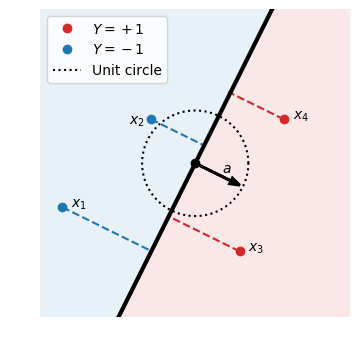

In [244]:
Random.seed!(7)
X = rand(4,2)
X = [-3 -1; -1 1; 1 -2; 2 1]
Y = cat(-ones(2), ones(2), dims=1)
as, betas, margins = logistic_reg_lin(X, Y, 0.1, 1000)
abars = as ./ betas'
a = abars[:,end]

fig = figure(figsize=[4,4])
plot(X[Y.==1,1], X[Y.==1,2],"oC3",label=L"Y=+1")
plot(X[Y.==-1,1], X[Y.==-1,2],"oC0",label=L"Y=-1")
ts = -5:0.01:5
fill_betweenx(ts, -a[2].*ts /a[1],4,alpha=0.1,color="C3")
fill_betweenx(ts, -4,-a[2].*ts /a[1],alpha=0.1,color="C0")
arrow(0,0,0.9*a[1],0.9*a[2],lw=2,head_width=0.15,color="k",overhang=0)
text(0.6,-0.2,L"a")
plot([0],[0],"ok")
#text(-0.95,0.1,L"(0,0)")
ts=0.0:0.01:2.0
plot(1.2*cospi.(ts),1.2*sinpi.(ts),":k",label="Unit circle")
f = 2.2
plot([X[1,1],X[1,1]+f*a[1]],[X[1,2], X[1,2] + f*a[2]],"--C0")
f = 1.3
plot([X[2,1],X[2,1]+f*a[1]],[X[2,2], X[2,2] + f*a[2]],"--C0")
f = -1.8
plot([X[3,1],X[3,1]+f*a[1]],[X[3,2], X[3,2] + f*a[2]],"--C3")
f = -1.4
plot([X[4,1],X[4,1]+f*a[1]],[X[4,2], X[4,2] + f*a[2]],"--C3")
text(X[1,1]+0.2,X[1,2],L"x_1")
text(X[2,1]-0.5,X[2,2]-0.1,L"x_2")
text(X[3,1]+0.2,X[3,2],L"x_3")
text(X[4,1]+0.2,X[4,2],L"x_4")
axis([-3.5,3.5,-3.5,3.5])
ts = -5:0.01:5
plot(-a[2].*ts /a[1], ts,"k",lw=3)
axis("off")
legend(loc=2)
savefig("max_margin.png",dpi=200, bbox_inches="tight")

In [237]:
?savefig

search: savefig StackOverflowError



Save the current figure.

Call signature::

  savefig(fname, dpi=None, facecolor='w', edgecolor='w',
          orientation='portrait', papertype=None, format=None,
          transparent=False, bbox_inches=None, pad_inches=0.1,
          frameon=None, metadata=None)

The output formats available depend on the backend being used.

Parameters
----------

fname : str or file-like object
    A string containing a path to a filename, or a Python
    file-like object, or possibly some backend-dependent object
    such as :class:`~matplotlib.backends.backend_pdf.PdfPages`.

    If *format* is *None* and *fname* is a string, the output
    format is deduced from the extension of the filename. If
    the filename has no extension, :rc:`savefig.format` is used.

    If *fname* is not a string, remember to specify *format* to
    ensure that the correct backend is used.

Other Parameters
----------------

dpi : [ *None* | scalar > 0 | 'figure' ]
    The resolution in dots per inch.  If *None*, def

### ?fill_betweenx

In [45]:
SS(u,v) = - log(exp(log(1+exp(-u))/2 + log(1+exp(-v))/2) - 1)
S(u,v) = - log(exp(-u)/2 +exp(-v)/2)
u = -20:0.05:20
v = -20:0.05:20

-20.0:0.05:20.0

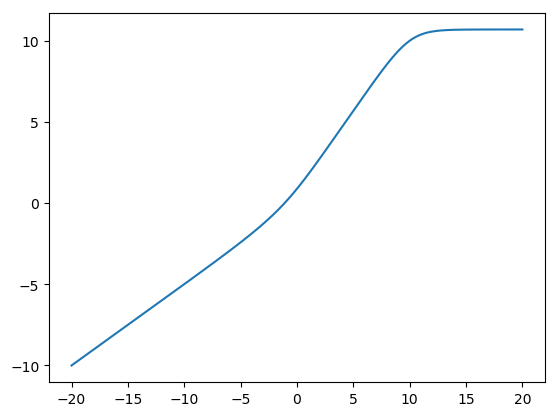

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fcb72454438>

In [46]:
plot(u,SS.(u,10))

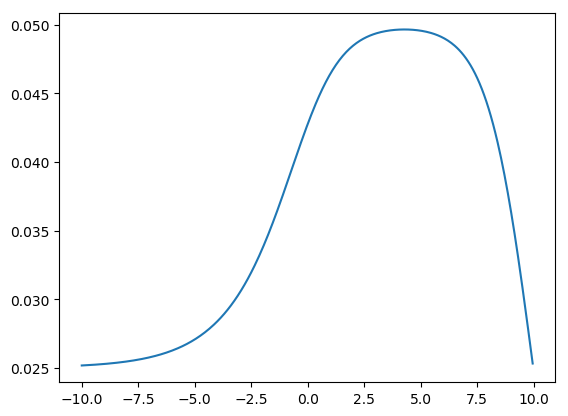

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fcb7177e7b8>

In [29]:
plot(u[1:end-1],SS.(u,10)[2:end].- SS.(u,10)[1:end-1])

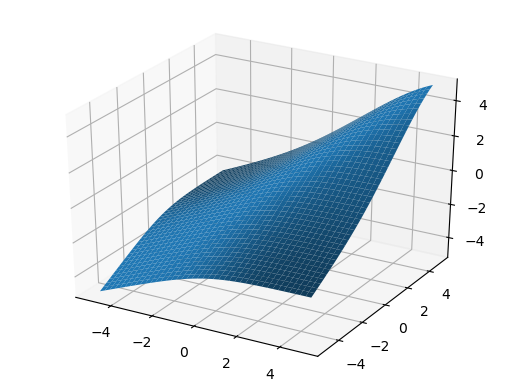

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7fcb70e4fa20>

In [24]:
surf(u,v,SS.(u,v'))

In [2]:
plot()

6.132375635173039